<a href="https://colab.research.google.com/github/VoXuanLanh/BT_fuzzy_Logic/blob/main/flower_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # upload kaggle.json từ máy bạn lên

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vxunlanzz","key":"fbb5836fd9d1fe9d043b0f5a27b7c58a"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d alxmamaev/flowers-recognition
!unzip flowers-recognition.zip -d flowers_data

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
Archive:  flowers-recognition.zip
  inflating: flowers_data/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers_data/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers_data/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers_data/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers_data/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers_data/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers_data/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers_data/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers_data/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers_data/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers_data/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers_data/flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers_data/flowers/

In [9]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

image_size= 64
base_path = '/content/flowers_data/flowers'
data = []
labels = []
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

for label_index, class_name in enumerate(class_names):
    folder = os.path.join(base_path, class_name)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
          img = cv2.resize(img, (image_size, image_size))
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = img.astype('float32') / 255
          data.append(img)
          labels.append(label_index)

data = np.array(data)
labels = np.array(labels)
labels_cat = to_categorical(labels)

img_flatten=data.reshape(len(data),64,64,3)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(img_flatten, labels_cat, test_size=0.2, random_state=42)

x_train = x_train.reshape(3453, 64*64*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(864, 64*64*3)
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(len(y_train))
print(x_train.ndim)
print(x_test.shape)
print(len(y_test))
print(x_test.ndim)


(3453, 12288)
3453
2
(864, 12288)
864
2


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(12288,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2195 - loss: 1.6041 - val_accuracy: 0.3414 - val_loss: 1.5707
Epoch 2/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2683 - loss: 1.5693 - val_accuracy: 0.3912 - val_loss: 1.5032
Epoch 3/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2870 - loss: 1.5280 - val_accuracy: 0.3796 - val_loss: 1.4422
Epoch 4/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3356 - loss: 1.4783 - val_accuracy: 0.4259 - val_loss: 1.4236
Epoch 5/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3535 - loss: 1.4397 - val_accuracy: 0.4028 - val_loss: 1.3565
Epoch 6/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3859 - loss: 1.3783 - val_accuracy: 0.4271 - val_loss: 1.3206
Epoch 7/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3921 - loss: 1.3719 - val_accuracy: 0.4236 - val_loss: 1.2970
Epoch 8/500
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4109 - loss: 1.3237 - 

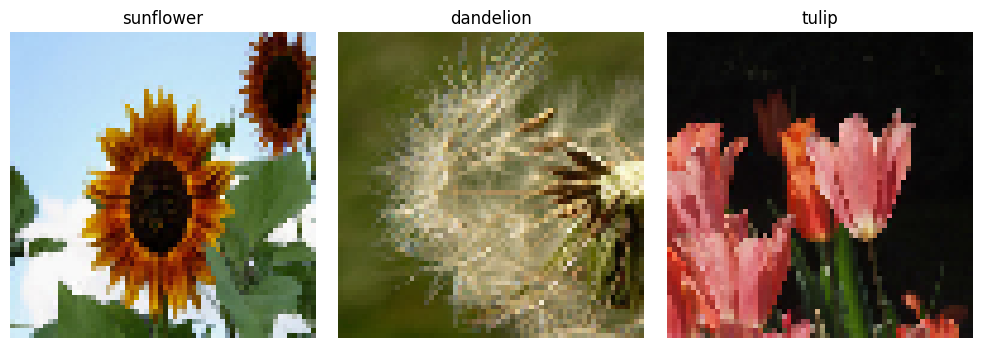

In [20]:
import matplotlib.pyplot as plt
import random

# Lấy ngẫu nhiên 3 ảnh từ danh sách
sample_indices = random.sample(range(len(data)), 3)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(data[idx].reshape(64, 64,3), cmap='gray')
    plt.title(class_names[np.argmax(labels_cat[idx])])
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Tien doan:  rose
Độ tin cậy:  1.0


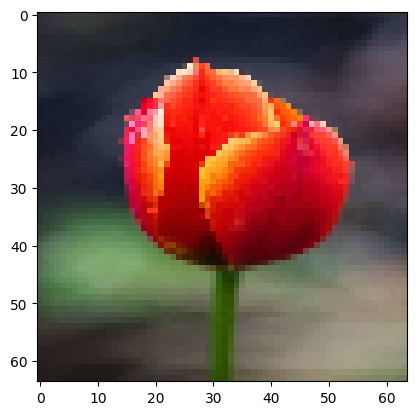

In [16]:
from keras.utils import load_img, img_to_array
import numpy as np
img=load_img('/content/hoa tulip.jpg',target_size=(64,64))
plt.imshow(img)
img_array=img_to_array(img)/255
img_flatten=img_array.reshape(1,64*64*3)
prediction=model.predict(img_flatten)
pre_classes = class_names[np.argmax(prediction)]
confidence = np.max(prediction)
print("Tien doan: ", pre_classes)
print('Độ tin cậy: ', confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Tien doan:  rose
Độ tin cậy:  1.0


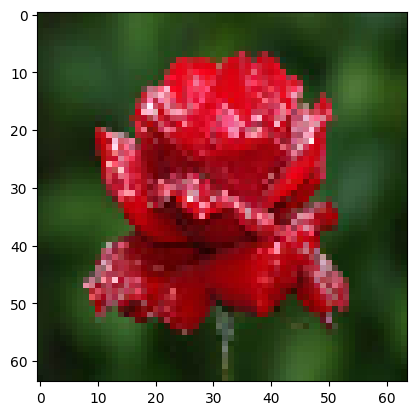

In [17]:
from keras.utils import load_img, img_to_array
import numpy as np
img=load_img('/content/hoa hồng.jpg',target_size=(64,64))
plt.imshow(img)
img_array=img_to_array(img)/255
img_flatten=img_array.reshape(1,64*64*3)
prediction=model.predict(img_flatten)
pre_classes = class_names[np.argmax(prediction)]
confidence = np.max(prediction)
print("Tien doan: ", pre_classes)
print('Độ tin cậy: ', confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Tien doan:  daisy
Độ tin cậy:  0.5774437


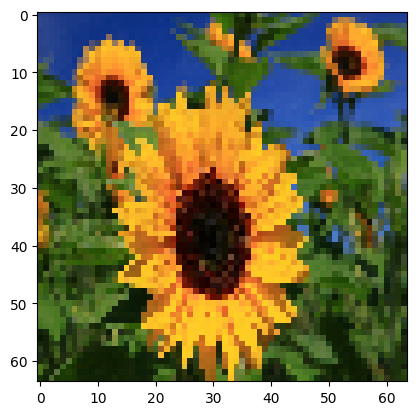

In [21]:
from keras.utils import load_img, img_to_array
import numpy as np
img=load_img('/content/hoa hướng dương.jpg',target_size=(64,64))
plt.imshow(img)
img_array=img_to_array(img)/255
img_flatten=img_array.reshape(1,64*64*3)
prediction=model.predict(img_flatten)
pre_classes = class_names[np.argmax(prediction)]
confidence = np.max(prediction)
print("Tien doan: ", pre_classes)
print('Độ tin cậy: ', confidence)

In [14]:
model.save('lan2.keras')